In [1]:
# install kaggle
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prashikkatyare1","key":"47ef46a21cf337e5ec2e175db2ec47c5"}'}

In [3]:
#create a kaggle directory
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
# permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d tolgadincer/labeled-chest-xray-images

 98% 1.15G/1.17G [00:13<00:00, 91.9MB/s]
100% 1.17G/1.17G [00:13<00:00, 95.4MB/s]


In [7]:
!unzip labeled-chest-xray-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2558319-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2559035-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2565226-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2568157-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2597757-0002.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-263932-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646645-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2646923-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2655558-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2659844-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-0001.jpeg  
  inflating: chest_xray/train/NORMAL/NORMAL-2675017-00

In [8]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

In [9]:
train_dir = '/content/chest_xray/train'
test_dir = '/content/chest_xray/test'

In [10]:
batch_size = 16
epochs = 20
img_height,img_width = 150,150
nb_train_samples = 5217
nb_validation_samples = 17

In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(img_height,img_width),
                                               batch_size=batch_size,
                                               class_mode='binary')

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(img_height,img_width),
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [14]:
model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='rmsprop')

In [15]:
mc = ModelCheckpoint(
    'pnemonia_model_mc.h5',
    monitor="val_loss",
    verbose=1,
    save_best_only=False,
)

In [16]:
history = model.fit(train_data,
                  epochs=epochs,
                  steps_per_epoch = nb_train_samples//batch_size)
model.save('../models/pneumonia_model.h5')

Epoch 1/20
326/326 [==============================] - 93s 250ms/step - loss: 0.4509 - accuracy: 0.7868
Epoch 2/20
326/326 [==============================] - 79s 243ms/step - loss: 0.3006 - accuracy: 0.8813
Epoch 3/20
326/326 [==============================] - 79s 244ms/step - loss: 0.2615 - accuracy: 0.9001
Epoch 4/20
326/326 [==============================] - 79s 243ms/step - loss: 0.2302 - accuracy: 0.9162
Epoch 5/20
326/326 [==============================] - 78s 241ms/step - loss: 0.2122 - accuracy: 0.9252
Epoch 6/20
326/326 [==============================] - 78s 239ms/step - loss: 0.2065 - accuracy: 0.9300
Epoch 7/20
326/326 [==============================] - 79s 243ms/step - loss: 0.1934 - accuracy: 0.9287
Epoch 8/20
326/326 [==============================] - 79s 241ms/step - loss: 0.1783 - accuracy: 0.9367
Epoch 9/20
326/326 [==============================] - 80s 245ms/step - loss: 0.1704 - accuracy: 0.9415
Epoch 10/20
326/326 [==============================] - 79s 242ms/step - l

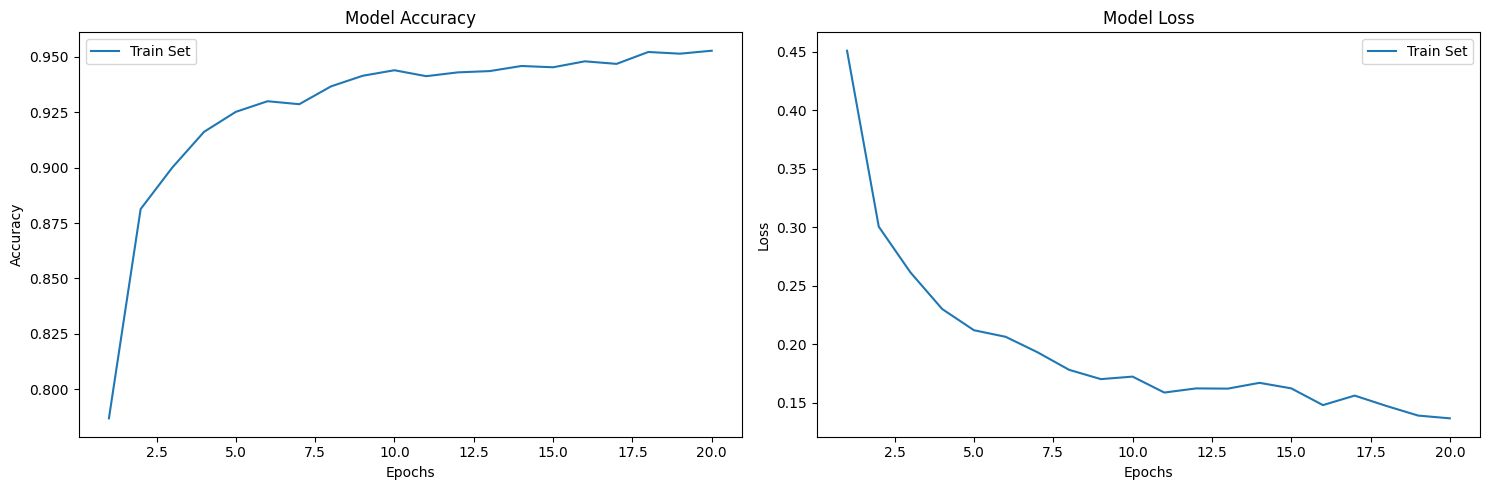

In [17]:
# plot model performance
acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')

plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')

plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [18]:
scores = model.evaluate(test_data)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

39/39 [==============================] - 6s 155ms/step - loss: 0.4384 - accuracy: 0.8462

accuracy: 84.62%


In [19]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 16.1 MB/s eta 0:00:00


In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow_addons as tfa
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPool2D

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


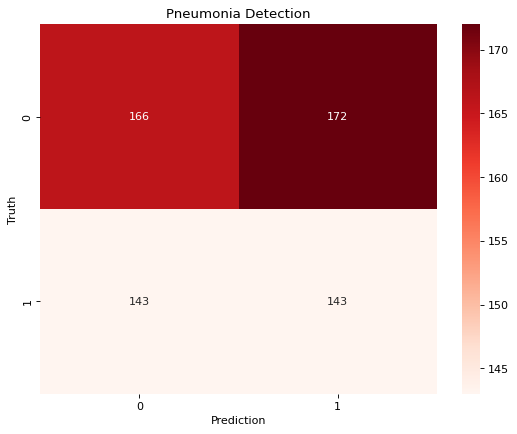

In [21]:
#Plot the confusion matrix to understand the classification in detail

pred_ls = np.random.randint(0, high=2, size=624)
test_ls = np.random.randint(0, high=2, size=624)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Reds', annot=True, fmt='d', xticklabels=[0,1], yticklabels=[0,1])

plt.title('Pneumonia Detection')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)